In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("delivery_time.csv")
df.head(10)

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
df.shape

(21, 2)

In [5]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
df.isnull().sum()

DeliveryTime    0
SortingTime     0
dtype: int64

In [8]:
df.skew()

DeliveryTime    0.352390
SortingTime     0.047115
dtype: float64

In [9]:
df.kurt()

DeliveryTime    0.317960
SortingTime    -1.148455
dtype: float64

In [10]:
df[['DeliveryTime','SortingTime']].cov()

,DeliveryTime,SortingTime
DeliveryTime,25.754619,10.655810
SortingTime,10.655810,6.461905


In [11]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [14]:
df['log_DeliveryTime']= np.log(df['SortingTime'])

<AxesSubplot:ylabel='Frequency'>

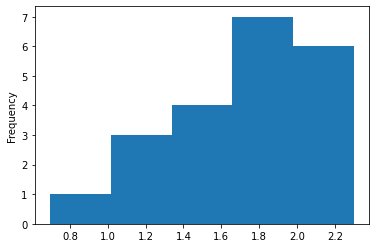

In [15]:
df['log_DeliveryTime'].plot.hist(bins = 5)

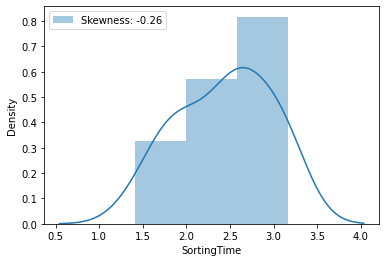

In [16]:
Sqrt_df = df["SortingTime"].map(lambda i: np.sqrt(i))
t=sns.distplot(Sqrt_df,label="Skewness: %.2f"%(Sqrt_df.skew()) )
t.legend()

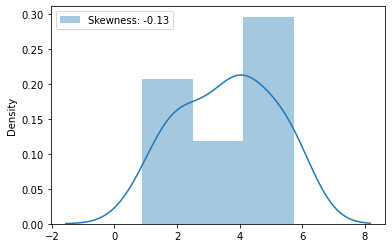

In [17]:
Boxcox_SortingTime = df["SortingTime"].map(lambda i: np.abs(i) if i < 0 else (i+1 if i==0 else i))
Boxcox_SortingTime= stats.boxcox(Boxcox_SortingTime)
Boxcox_SortingTime= pd.Series(Boxcox_SortingTime[0])
t=sns.distplot(Boxcox_SortingTime,label="Skewness: %.2f"%(Boxcox_SortingTime.skew()) )
t.legend()

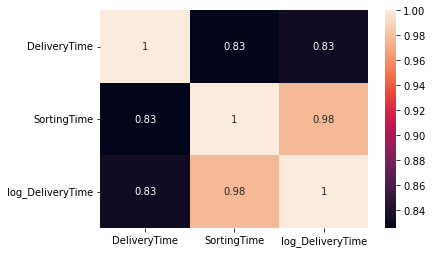

In [18]:
sns.heatmap(df.corr(),annot=True)
plt.show()

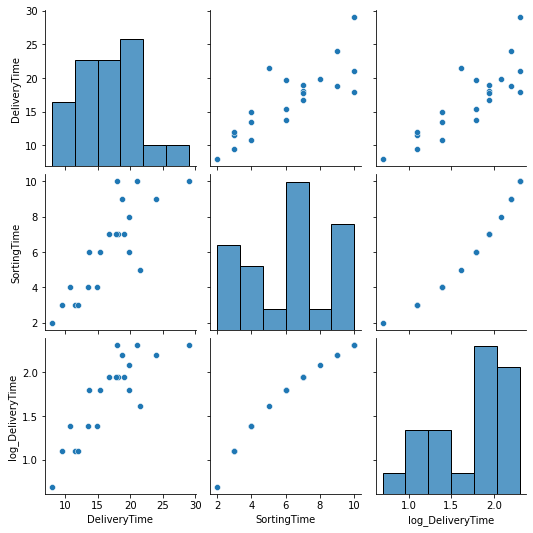

In [19]:
sns.pairplot(df)
plt.show()

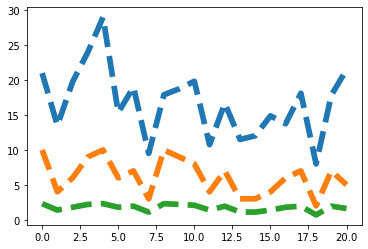

In [20]:
plt.plot(df, linestyle = '--', linewidth='5.7')
plt.show()

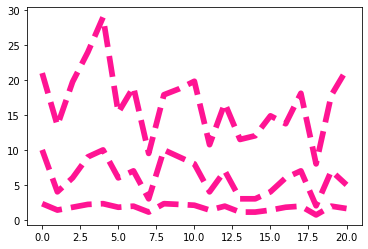

In [21]:
plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')
plt.show()

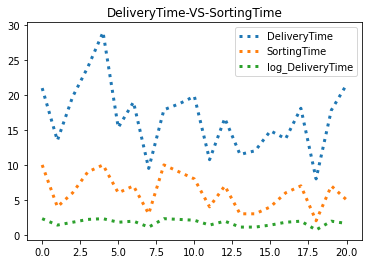

In [22]:
df.plot.line(linestyle = ':', linewidth='3')
plt.title('DeliveryTime-VS-SortingTime')
plt.show()

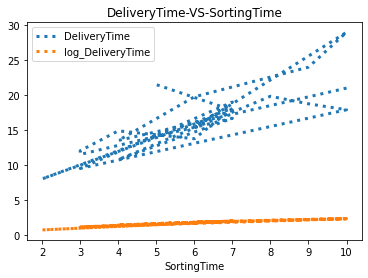

In [23]:
df = pd.DataFrame(data=df)
df.plot.line(x='SortingTime',linestyle = ':', linewidth='3')
plt.title('DeliveryTime-VS-SortingTime')
plt.show()

In [24]:
X=df.drop('SortingTime',axis=1)

In [25]:
y=df.SortingTime

In [26]:
X.head()

,DeliveryTime,log_DeliveryTime
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585


In [27]:
y.head()

0    10
1     4
2     6
3     9
4    10
Name: SortingTime, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.30)

In [30]:
print(X_train.shape)

(14, 2)


In [31]:
X_test.shape

(7, 2)

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
LR=LinearRegression()

In [34]:
LR.fit(X_train,y_train)

LinearRegression()

In [35]:
LR.intercept_ 

-2.538128674533435

In [36]:
LR.coef_   

array([0.08853501, 4.21483692])

In [37]:
y_pred=LR.predict(X_test)

In [38]:
y_pred

array([8.75166858, 3.11049552, 6.14889228, 4.50009855, 4.25662729,
       7.98202746, 3.15741908])

In [39]:
y_test

8     10
13     3
20     5
1      4
11     4
10     8
14     3
Name: SortingTime, dtype: int64

In [40]:
from sklearn import metrics

In [41]:
R2=metrics.r2_score(y_test,y_pred)

In [42]:
R2

0.9255892181633854

In [43]:
print(metrics.mean_absolute_error(y_test,y_pred))

0.4914052381410923


In [44]:
print(metrics.mean_squared_error(y_test,y_pred))

0.46165056486389516


In [45]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

0.6794487212909412


In [47]:
error= y_test-y_pred

In [48]:
error

8     1.248331
13   -0.110496
20   -1.148892
1    -0.500099
11   -0.256627
10    0.017973
14   -0.157419
Name: SortingTime, dtype: float64

In [49]:
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

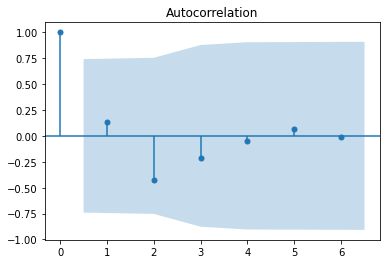

In [50]:
acf=plot_acf(error)
plt.show()

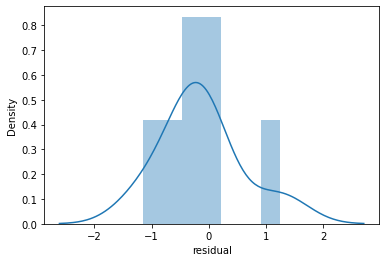

In [51]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

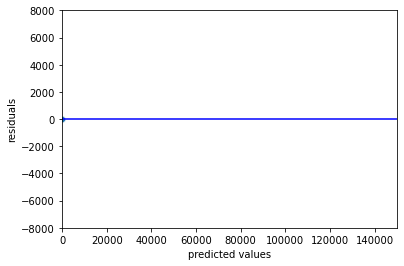

In [53]:
sns.scatterplot(x=y_pred,y=error)
plt.xlabel('predicted values')
plt.ylabel('residuals')
plt.xlim([0,150000])
plt.ylim([-8000,8000])
sns.lineplot([0,150000],[0,0],color='blue')
plt.show()

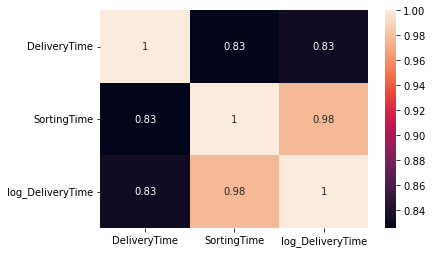

In [54]:
sns.heatmap(df.corr(),annot=True)
plt.show()